In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape

(8523, 12)

In [4]:
test.shape

(5681, 11)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [6]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


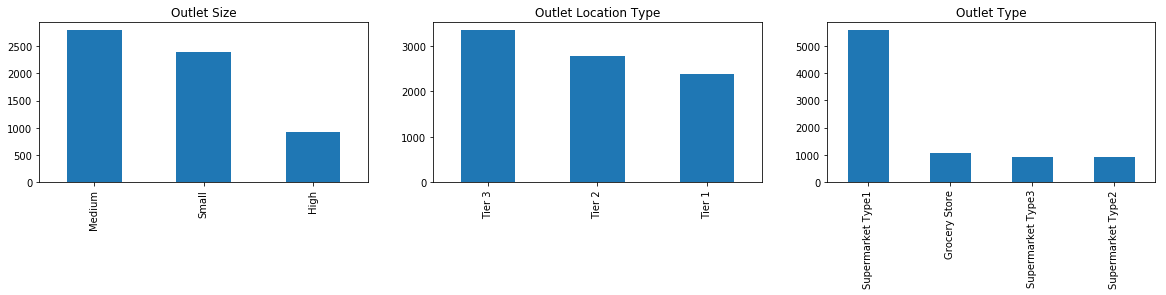

In [7]:
plt.figure(1,figsize=(20,10))
plt.subplot(331)
train['Outlet_Size'].value_counts().plot.bar(title = 'Outlet Size')

plt.subplot(332)
train['Outlet_Location_Type'].value_counts().plot.bar(title = 'Outlet Location Type')

plt.subplot(333)
train['Outlet_Type'].value_counts().plot.bar(title = 'Outlet Type')

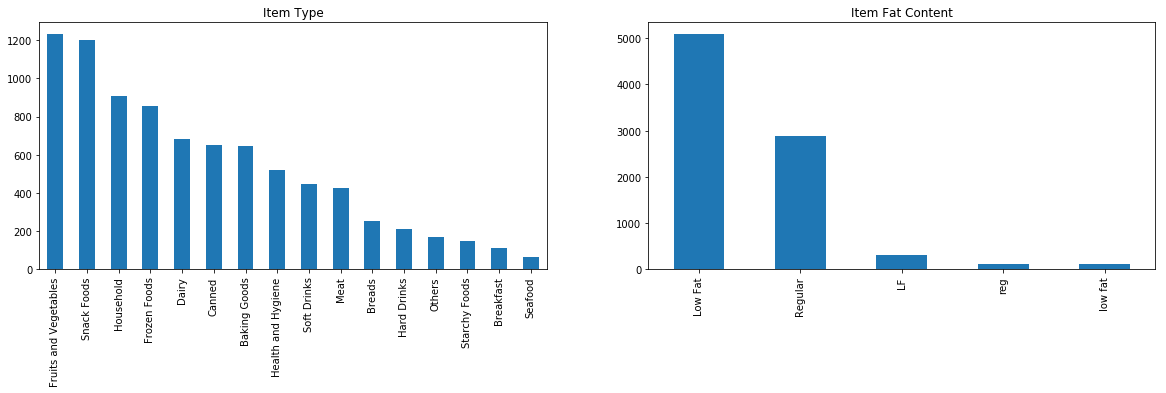

In [8]:
plt.figure(1,figsize = (20,10))
plt.subplot(221)
train['Item_Type'].value_counts().plot.bar(title = 'Item Type')

plt.subplot(222)
train['Item_Fat_Content'].value_counts().plot.bar(title = 'Item Fat Content')

plt.show()

In [9]:
train['Item_Fat_Content'].replace('LF' , 'Low Fat',inplace = True)
train['Item_Fat_Content'].replace('low fat' , 'Low Fat',inplace = True)
train['Item_Fat_Content'].replace('reg','Regular',inplace = True)

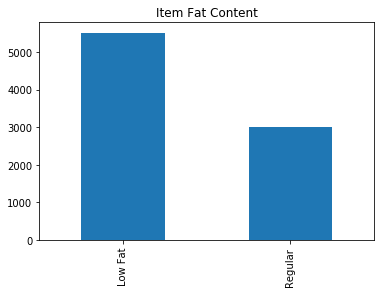

In [10]:
train['Item_Fat_Content'].value_counts().plot.bar(title = 'Item Fat Content')

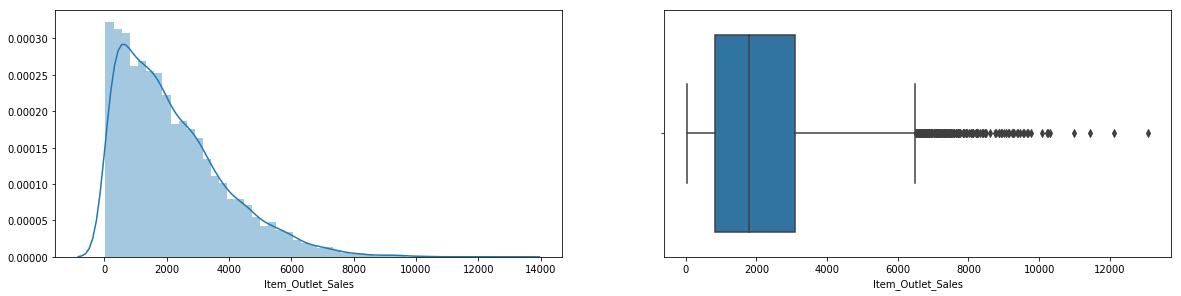

In [11]:
plt.figure(1,figsize = (20,10))
plt.subplot(221)
sns.distplot(train['Item_Outlet_Sales'])
plt.subplot(222)
sns.boxplot(train['Item_Outlet_Sales'])

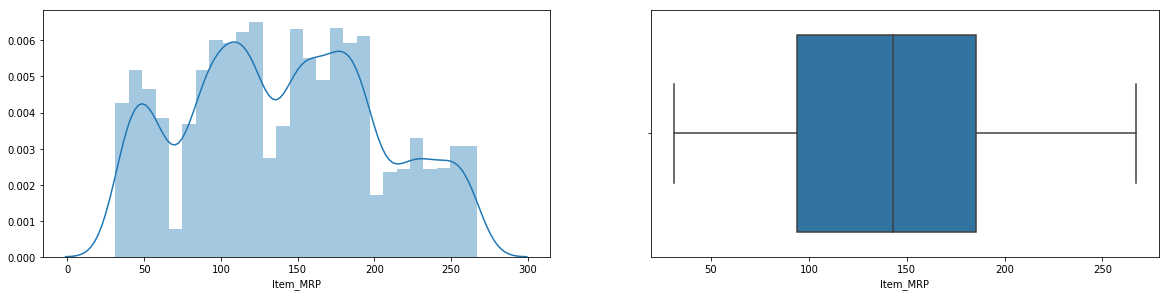

In [12]:
plt.figure(1,figsize = (20,10))
plt.subplot(221)
sns.distplot(train['Item_MRP'])
plt.subplot(222)
sns.boxplot(train['Item_MRP'])


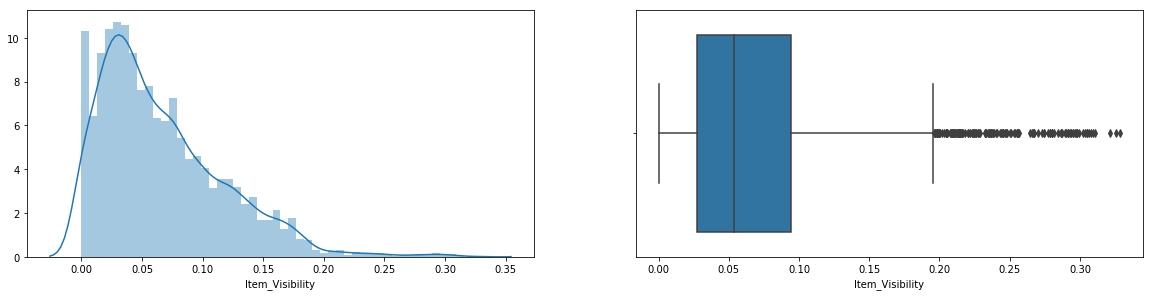

In [13]:
plt.figure(1,figsize = (20,10))
plt.subplot(221)
sns.distplot(train['Item_Visibility'])
plt.subplot(222)
sns.boxplot(train['Item_Visibility'])


In [14]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [16]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace = True)
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0],inplace = True)

In [17]:
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace = True)
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0],inplace = True)

In [18]:
min(train['Item_Outlet_Sales'])

33.29

In [19]:
max(train['Item_Outlet_Sales'])

13086.9648

In [20]:
bins = [0,1000,5000,10000,15000] 
group = ['low','medium','high','very high']
train['Item_Outlet_Sales_bin'] = pd.cut(train['Item_Outlet_Sales'],bins,labels = group)

In [21]:
type_sales = pd.crosstab(train['Outlet_Type'],train['Item_Outlet_Sales_bin'])

In [22]:
type_sales

Item_Outlet_Sales_bin,low,medium,high,very high
Outlet_Type,,,,
Grocery Store,1052,31,0,0
Supermarket Type1,1152,4066,358,1
Supermarket Type2,238,651,39,0
Supermarket Type3,62,642,224,7


Text(0, 0.5, 'Item Outlet Sales')

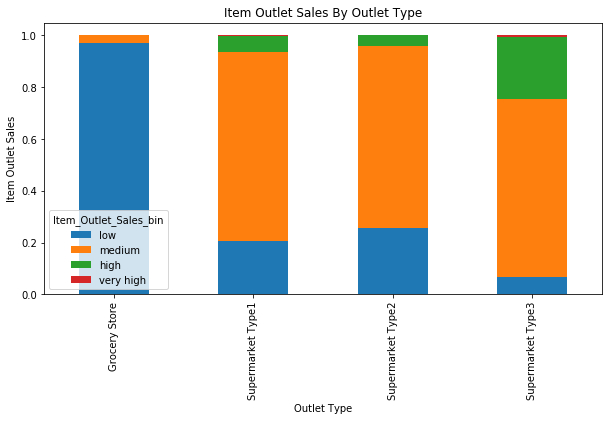

In [23]:
type_sales.div(type_sales.sum(1).astype(float),axis = 0).plot(kind = "bar",stacked = True,title = 'Item Outlet Sales By Outlet Type',figsize = (10,5))
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')

In [24]:
Location_sales = pd.crosstab(train['Outlet_Location_Type'],train['Item_Outlet_Sales_bin'])

Text(0, 0.5, 'Item Outlet Sales')

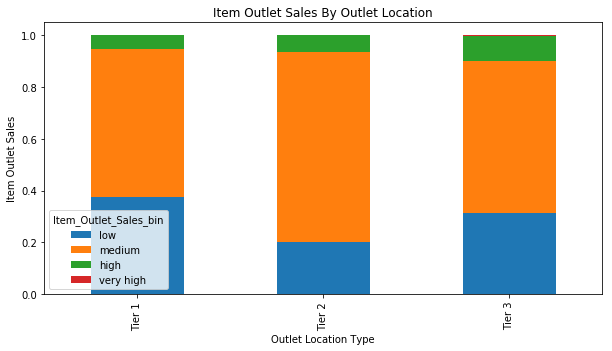

In [25]:
Location_sales.div(Location_sales.sum(1).astype(float),axis = 0).plot(kind = "bar",stacked = True,title = 'Item Outlet Sales By Outlet Location',figsize = (10,5))
plt.xlabel('Outlet Location Type')
plt.ylabel('Item Outlet Sales')

In [26]:
fat_sales = pd.crosstab(train['Item_Fat_Content'],train['Item_Outlet_Sales_bin'])

Text(0, 0.5, 'Item Outlet Sales')

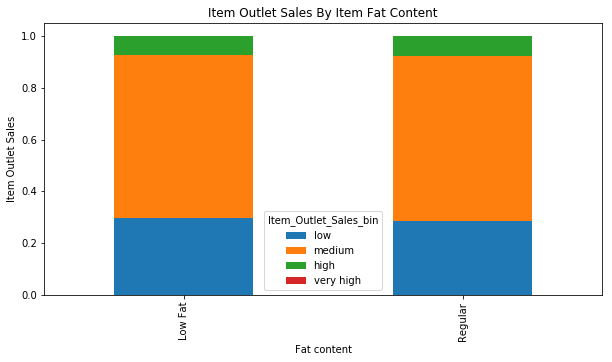

In [27]:
fat_sales.div(fat_sales.sum(1).astype(float),axis = 0).plot(kind = "bar",stacked = True,title = 'Item Outlet Sales By Item Fat Content',figsize = (10,5))
plt.xlabel('Fat content')
plt.ylabel('Item Outlet Sales')

In [28]:
fat_sales

Item_Outlet_Sales_bin,low,medium,high,very high
Item_Fat_Content,,,,
Low Fat,1640,3474,398,5
Regular,864,1916,223,3


In [29]:
size_sales = pd.crosstab(train['Outlet_Size'],train['Item_Outlet_Sales_bin'])

Text(0, 0.5, 'Item Outlet Sales')

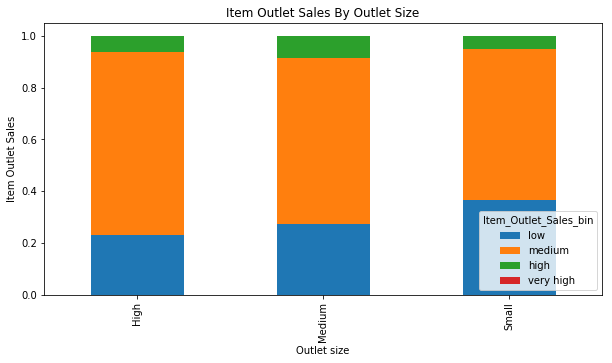

In [30]:
size_sales.div(size_sales.sum(1).astype(float),axis = 0).plot(kind = "bar",stacked = True,title = 'Item Outlet Sales By Outlet Size',figsize = (10,5))
plt.xlabel('Outlet size')
plt.ylabel('Item Outlet Sales')

In [31]:
size_sales

Item_Outlet_Sales_bin,low,medium,high,very high
Outlet_Size,,,,
High,215,658,58,1
Medium,1416,3339,441,7
Small,873,1393,122,0


In [32]:
Item_type_sales = pd.crosstab(train['Item_Type'],train['Item_Outlet_Sales_bin'])

Text(0, 0.5, 'Item Outlet Sales')

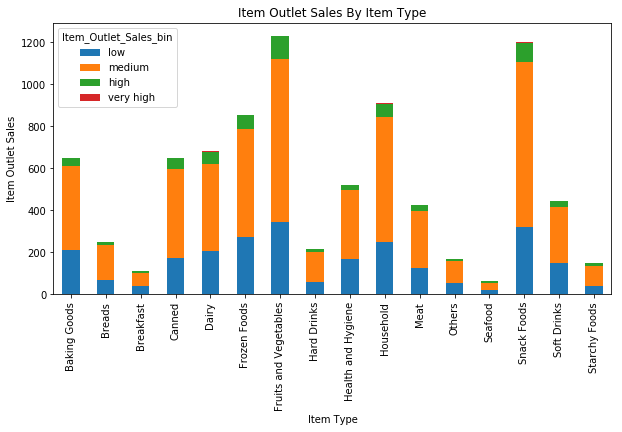

In [33]:
Item_type_sales.plot(kind = "bar",stacked = True,title = 'Item Outlet Sales By Item Type',figsize = (10,5))
plt.xlabel('Item Type')
plt.ylabel('Item Outlet Sales')

In [34]:
Item_type_sales

Item_Outlet_Sales_bin,low,medium,high,very high
Item_Type,,,,
Baking Goods,211,402,35,0
Breads,67,168,16,0
Breakfast,38,63,9,0
Canned,172,427,49,1
Dairy,209,411,60,2
Frozen Foods,275,514,67,0
Fruits and Vegetables,344,778,108,2
Hard Drinks,61,142,11,0
Health and Hygiene,168,328,24,0


In [35]:
min(train['Item_MRP'])

31.29

In [36]:
max(train['Item_MRP'])

266.8884

In [37]:
bins = [0,100,150,250,300]
groups = ['low','medium','high','very high']
train['Item_MRP_bin'] = pd.cut(train['Item_MRP'],bins,labels = groups)

In [38]:
MRP_Sales = pd.crosstab(train['Item_MRP_bin'],train['Item_Outlet_Sales_bin'])

Text(0, 0.5, 'Outlet Sales')

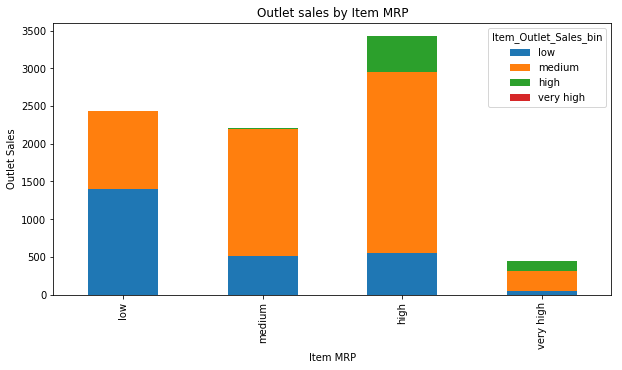

In [39]:
MRP_Sales.plot(kind = "bar",stacked = True, title = 'Outlet sales by Item MRP',figsize = (10,5))
plt.xlabel('Item MRP')
plt.ylabel('Outlet Sales')

In [40]:
MRP_Sales

Item_Outlet_Sales_bin,low,medium,high,very high
Item_MRP_bin,,,,
low,1395,1044,0,0
medium,508,1681,21,0
high,550,2401,474,5
very high,51,264,126,3


In [41]:
min(train['Item_Visibility'])

0.0

In [42]:
max(train['Item_Visibility'])

0.328390948

In [43]:
train['Item_Visibility']= train['Item_Visibility'].astype('float') * 100

In [44]:
bins = [0,10,25,35]
groups = ['small','little big','big']
train['Item_Visbility_bin'] = pd.cut(train['Item_Visibility'],bins,labels = groups)

In [45]:
visible_sales = pd.crosstab(train['Item_Visbility_bin'],train['Item_Outlet_Sales_bin'])

Text(0, 0.5, 'visbility')

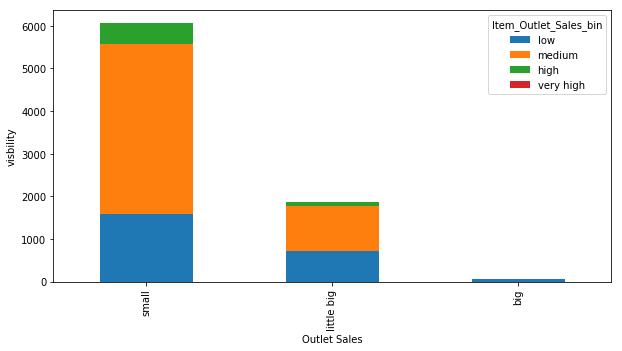

In [46]:
visible_sales.plot(kind = "bar" ,stacked = "True",figsize = (10,5))
plt.xlabel('Outlet Sales')
plt.ylabel('visbility')

In [47]:
min(train['Item_Weight'])

4.555

In [48]:
max(train['Item_Weight'])

21.35

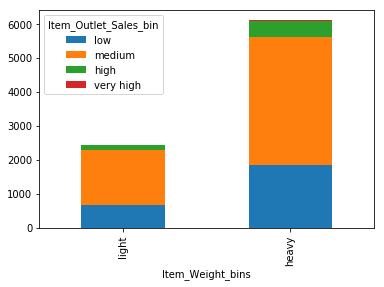

In [49]:
bins = [0,10,22] 
groups = ['light','heavy']
train['Item_Weight_bins'] = pd.cut(train['Item_Weight'],bins,labels = groups)
weight_sales = pd.crosstab(train['Item_Weight_bins'],train['Item_Outlet_Sales_bin'])
weight_sales.plot(kind = "bar",stacked = True)

In [50]:
min(train['Outlet_Establishment_Year'])

1985

In [51]:
max(train['Outlet_Establishment_Year'])

2009

In [52]:
bins= [0,1985,1995,2010]
groups= ['old','little old','new']
train['Outlet_Establishment_year_bin'] = pd.cut(train['Outlet_Establishment_Year'],bins,labels = groups)


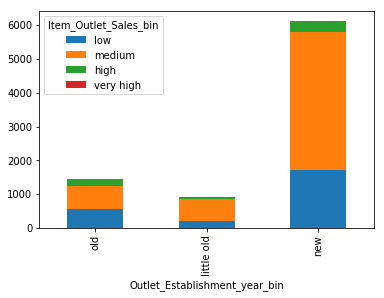

In [53]:
year_sales = pd.crosstab(train['Outlet_Establishment_year_bin'],train['Item_Outlet_Sales_bin'])
year_sales.plot(kind = "bar",stacked = True)

In [54]:
train.shape

(8523, 17)

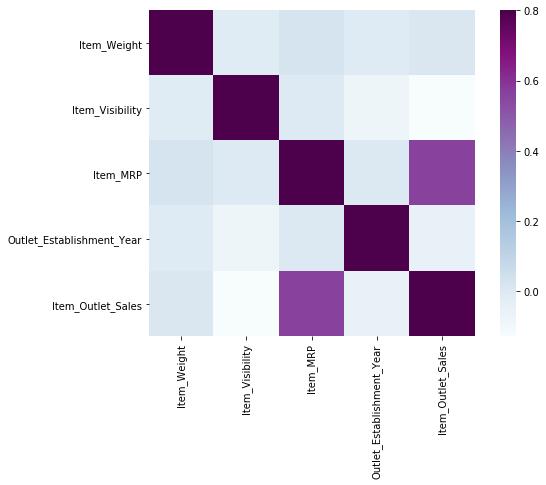

In [55]:
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [56]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


In [57]:
train.isnull().sum()

Item_Identifier                    0
Item_Weight                        0
Item_Fat_Content                   0
Item_Visibility                    0
Item_Type                          0
Item_MRP                           0
Outlet_Identifier                  0
Outlet_Establishment_Year          0
Outlet_Size                        0
Outlet_Location_Type               0
Outlet_Type                        0
Item_Outlet_Sales                  0
Item_Outlet_Sales_bin              0
Item_MRP_bin                       0
Item_Visbility_bin               526
Item_Weight_bins                   0
Outlet_Establishment_year_bin      0
dtype: int64

In [58]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace = True)

In [59]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0],inplace = True)

In [60]:
train.isnull().sum()

Item_Identifier                    0
Item_Weight                        0
Item_Fat_Content                   0
Item_Visibility                    0
Item_Type                          0
Item_MRP                           0
Outlet_Identifier                  0
Outlet_Establishment_Year          0
Outlet_Size                        0
Outlet_Location_Type               0
Outlet_Type                        0
Item_Outlet_Sales                  0
Item_Outlet_Sales_bin              0
Item_MRP_bin                       0
Item_Visbility_bin               526
Item_Weight_bins                   0
Outlet_Establishment_year_bin      0
dtype: int64

In [61]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


In [62]:
train.isnull().sum()

Item_Identifier                    0
Item_Weight                        0
Item_Fat_Content                   0
Item_Visibility                    0
Item_Type                          0
Item_MRP                           0
Outlet_Identifier                  0
Outlet_Establishment_Year          0
Outlet_Size                        0
Outlet_Location_Type               0
Outlet_Type                        0
Item_Outlet_Sales                  0
Item_Outlet_Sales_bin              0
Item_MRP_bin                       0
Item_Visbility_bin               526
Item_Weight_bins                   0
Outlet_Establishment_year_bin      0
dtype: int64

In [63]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [64]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 17 columns):
Item_Identifier                  8523 non-null object
Item_Weight                      8523 non-null float64
Item_Fat_Content                 8523 non-null object
Item_Visibility                  8523 non-null float64
Item_Type                        8523 non-null object
Item_MRP                         8523 non-null float64
Outlet_Identifier                8523 non-null object
Outlet_Establishment_Year        8523 non-null int64
Outlet_Size                      8523 non-null object
Outlet_Location_Type             8523 non-null object
Outlet_Type                      8523 non-null object
Item_Outlet_Sales                8523 non-null float64
Item_Outlet_Sales_bin            8523 non-null category
Item_MRP_bin                     8523 non-null category
Item_Visbility_bin               7997 non-null category
Item_Weight_bins                 8523 non-null category
Outlet_Establishme

In [66]:
train = train.drop(['Outlet_Identifier','Item_Identifier','Item_Outlet_Sales_bin','Item_MRP_bin','Item_Visbility_bin','Item_Weight_bins','Outlet_Establishment_year_bin'],1)


In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 665.9+ KB


In [68]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  5681 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  5681 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [69]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [70]:
test_item = test['Item_Identifier']
test_outlet_id = test['Outlet_Identifier']
test.drop(['Outlet_Identifier','Item_Identifier'],1,inplace = True)

In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 665.9+ KB


In [72]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
Item_Weight                  5681 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  5681 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 399.5+ KB


In [73]:
test['Item_Fat_Content'].replace('LF' , 'Low Fat',inplace = True)
test['Item_Fat_Content'].replace('low fat' , 'Low Fat',inplace = True)
test['Item_Fat_Content'].replace('reg','Regular',inplace = True)

In [74]:
test.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [75]:
train.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [76]:
train.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [77]:
test.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [78]:
X = train.drop('Item_Outlet_Sales',1)
y = train.Item_Outlet_Sales

In [79]:
test['Item_Fat_Content'].replace('LF' , 'Low Fat',inplace = True)
test['Item_Fat_Content'].replace('low fat' , 'Low Fat',inplace = True)
test['Item_Fat_Content'].replace('reg','Regular',inplace = True)

In [80]:
x = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x_train,x_cv,y_train,y_cv = train_test_split(x,y,test_size = 0.33)

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import xgboost


In [84]:
model = LinearRegression()
model_lass = Lasso()
model_ridge = Ridge()
regressor = RandomForestRegressor(n_estimators =100, random_state = 3)
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7,objective = 'reg:squarederror')

In [85]:
i = 1
kf = KFold(n_splits = 5)
print("Linear regression: ")
for train_index,test_index in kf.split(x,y):
    xtr,xvl = x.loc[train_index],x.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]
    model.fit(xtr, ytr)     
    pred_linear = model.predict(xvl)     
    score = model.score(xtr,ytr) 
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    i+=1
    print('accuracy_score :',score)
    print('rmse: ',sqrt(mean_squared_error(yvl,pred_linear)))

Linear regression: 

1 of kfold 5
accuracy_score : 0.5612370680530976
rmse:  1153.3296622076332

2 of kfold 5
accuracy_score : 0.5655355282869647
rmse:  1122.7674263366684

3 of kfold 5
accuracy_score : 0.5667133371639195
rmse:  1113.4490206395608

4 of kfold 5
accuracy_score : 0.5629210621926699
rmse:  1130.9917286410425

5 of kfold 5
accuracy_score : 0.563170970977755
rmse:  1143.7208515662498


In [86]:
i = 1
kf = KFold(n_splits = 5)
print("Lasso regression: ")
for train_index,test_index in kf.split(x,y):
    xtr,xvl = x.loc[train_index],x.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]
    model_lass.fit(xtr, ytr)     
    pred_laso = model_lass.predict(xvl)     
    score = model_lass.score(xtr,ytr) 
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    i+=1
    print('accuracy_score',score) 
    print('rmse: ',sqrt(mean_squared_error(yvl,pred_laso)))

Lasso regression: 

1 of kfold 5
accuracy_score 0.5605091719576973
rmse:  1152.9142967162463

2 of kfold 5
accuracy_score 0.5648895239433666
rmse:  1122.3438688630877

3 of kfold 5
accuracy_score 0.5659957783230625
rmse:  1113.078888063656

4 of kfold 5
accuracy_score 0.5622696488418782
rmse:  1129.9338860653388

5 of kfold 5
accuracy_score 0.5624484790209563
rmse:  1142.7761217774319


In [87]:
i = 1
kf = KFold(n_splits = 5)
print("Ridge regression: ")
for train_index,test_index in kf.split(x,y):
    xtr,xvl = x.loc[train_index],x.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]
    model_ridge.fit(xtr, ytr)     
    pred_ridge = model_ridge.predict(xvl)     
    score = model_ridge.score(xtr,ytr) 
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    i+=1
    print('accuracy_score',score) 
    print('rmse: ',sqrt(mean_squared_error(yvl,pred_ridge)))

Ridge regression: 

1 of kfold 5
accuracy_score 0.5612232458122719
rmse:  1153.3237247552042

2 of kfold 5
accuracy_score 0.5655234008657185
rmse:  1122.8457645364963

3 of kfold 5
accuracy_score 0.5666997092054357
rmse:  1113.3860143170516

4 of kfold 5
accuracy_score 0.5629079722275507
rmse:  1130.9974998765324

5 of kfold 5
accuracy_score 0.5631567928469063
rmse:  1143.6929685111209


In [88]:
i = 1
kf = KFold(n_splits = 5)
print("XG boost : ")
for train_index,test_index in kf.split(x,y):
    xtr,xvl = x.loc[train_index],x.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]
    xgb.fit(xtr, ytr)     
    pred_xgboost = xgb.predict(xvl)     
    score = xgb.score(xtr,ytr) 
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    i+=1
    print('accuracy_score',score) 
    print('rmse: ',sqrt(mean_squared_error(yvl,pred_xgboost)))

XG boost : 


/home/vivek/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



1 of kfold 5
accuracy_score 0.7734059989489468
rmse:  1130.7800246928423


/home/vivek/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



2 of kfold 5
accuracy_score 0.7752864000317017
rmse:  1117.2137048242575


/home/vivek/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



3 of kfold 5
accuracy_score 0.7745340577307066
rmse:  1106.4815503820298


/home/vivek/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



4 of kfold 5
accuracy_score 0.7757498801827429
rmse:  1116.4259703539165


/home/vivek/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



5 of kfold 5
accuracy_score 0.7661083590406952
rmse:  1111.077488682556


In [89]:
i=1
print("Random Forest: ")
for train_index,test_index in kf.split(x,y):
    xtr,xvl = x.loc[train_index],x.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]
    regressor.fit(xtr, ytr)     
    pred_regressor = regressor.predict(xvl)     
    score = regressor.score(xtr,ytr)   
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    i+=1
    print('accuracy_score',score)
    print('rmse: ',sqrt(mean_squared_error(yvl,pred_regressor)))

Random Forest: 

1 of kfold 5
accuracy_score 0.9372157980945635
rmse:  1151.542035158832

2 of kfold 5
accuracy_score 0.9387447219350034
rmse:  1148.9159430597567

3 of kfold 5
accuracy_score 0.938908882606719
rmse:  1146.4235189915016

4 of kfold 5
accuracy_score 0.9367312233094832
rmse:  1137.915679953533

5 of kfold 5
accuracy_score 0.9369553410088717
rmse:  1138.8130183225267


In [90]:
submission_p = xgb.predict(test)

In [91]:
submission_p

array([1621.8949  , 1294.6921  ,    9.963693, ..., 2036.3578  ,
       4061.7083  , 1282.9498  ], dtype=float32)

In [92]:
submission_p.shape

(5681,)

In [93]:
submission = pd.read_csv('SampleSubmission.csv')

In [94]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,NaN
1,FDW14,OUT017,NaN
2,NCN55,OUT010,NaN
3,FDQ58,OUT017,NaN
4,FDY38,OUT027,NaN


In [95]:
submission.shape

(5681, 3)

In [96]:
submission['Item_Outlet_Sales'] = submission_p

In [97]:
submission['Item_Identifier'] = test_item
submission['Outlet_Identifier'] = test_outlet_id

In [98]:
pd.DataFrame(submission, columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']).to_csv('final.csv',index = False)

In [99]:
f = pd.read_csv('final.csv')

In [100]:
f.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1621.894900
1,FDW14,OUT017,1294.692100
2,NCN55,OUT010,9.963693
3,FDQ58,OUT017,2636.066000
4,FDY38,OUT027,6051.008000
